<a href="https://colab.research.google.com/github/firarru/NLP-Spotify-Review/blob/main/NLP_Spotify_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Setup**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

### **Loading Data**

In [3]:
url = 'https://raw.githubusercontent.com/firarru/NLP-Spotify-Review/refs/heads/main/Dataset/reviews.csv'
df = pd.read_csv(url, index_col=0)
df

,Review,Rating,Total_thumbsup,Reply
Time_submitted,,,,
2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...
2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61594 entries, 2022-07-09 15:00:00 to 2022-01-01 00:19:09
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review          61594 non-null  object
 1   Rating          61594 non-null  int64 
 2   Total_thumbsup  61594 non-null  int64 
 3   Reply           216 non-null    object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [5]:
df['Rating'].value_counts()

,count
Rating,
5,22095
1,17653
4,7842
2,7118
3,6886


In [6]:
df['Total_thumbsup'].value_counts()

,count
Total_thumbsup,
0,42112
1,8360
2,2968
3,1392
4,871
...,...
4550,1
4791,1
713,1


In [7]:
df['Reply'].fillna('No Reply', inplace=True)

Mengubah kolom rating menjadi data biner

In [8]:
# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating > 3 and rating < 6:
        return "Positive"
    if rating > 0 and rating < 4:
        return "Negative"

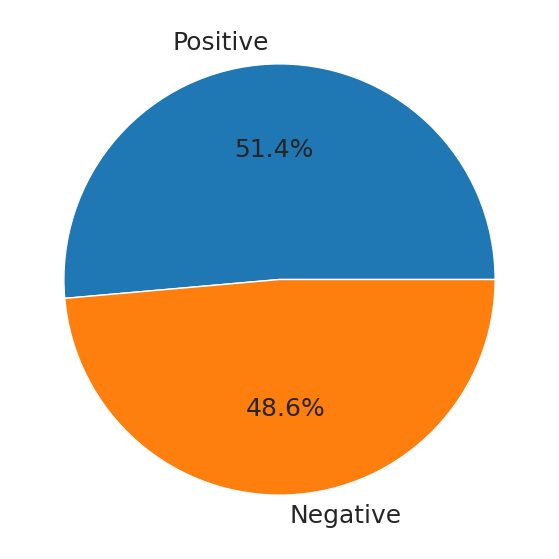

In [9]:
df['Rating_Biner'] = df['Rating'].apply(ratings)
plt.pie(df['Rating_Biner'].value_counts(), labels=df['Rating_Biner'].unique().tolist(), autopct='%1.1f%%')
plt.show()

### **EDA**

1. Menghitung karakter dalam setiap review

In [10]:
length = len(df['Review'][0])
print('Panjang karakter dalam Review:', length)

Panjang karakter dalam Review: 112


In [11]:
df['Char_Length'] = df['Review'].str.len()
df.head(5)

,Review,Rating,Total_thumbsup,Reply,Rating_Biner,Char_Length
Time_submitted,,,,,,
2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,No Reply,Positive,112
2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,No Reply,Positive,86
2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,No Reply,Positive,106
2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,No Reply,Negative,47
2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,No Reply,Negative,100


2. Menghitung jumlah kata dalam setiap review

In [12]:
word_count = df['Review'][0].split()
print('Jumlah kata dalam Review:', len(word_count))

Jumlah kata dalam Review: 21


In [13]:
def word_count(review):
  review_list = review.split()
  return len(review_list)

In [14]:
df['Word_Count'] = df['Review'].apply(word_count)
df.head(5)

,Review,Rating,Total_thumbsup,Reply,Rating_Biner,Char_Length,Word_Count
Time_submitted,,,,,,,
2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,No Reply,Positive,112,21
2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,No Reply,Positive,86,15
2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,No Reply,Positive,106,19
2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,No Reply,Negative,47,9
2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,No Reply,Negative,100,21


3. Menghitung average panjang kata

In [15]:
df['Mean Word Length'] = df['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head(5)

,Review,Rating,Total_thumbsup,Reply,Rating_Biner,Char_Length,Word_Count,Mean Word Length
Time_submitted,,,,,,,,
2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,No Reply,Positive,112,21,4.380952
2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,No Reply,Positive,86,15,4.800000
2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,No Reply,Positive,106,19,4.631579
2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,No Reply,Negative,47,9,4.333333
2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,No Reply,Negative,100,21,3.809524


4. Menghitung average panjang kalimat

In [16]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['Review'][0])])

55.5

In [18]:
df['Mean Sentence Length'] = df['Review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df.head(5)

,Review,Rating,Total_thumbsup,Reply,Rating_Biner,Char_Length,Word_Count,Mean Word Length,Mean Sentence Length
Time_submitted,,,,,,,,,
2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,No Reply,Positive,112,21,4.380952,55.5
2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,No Reply,Positive,86,15,4.800000,28.0
2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,No Reply,Positive,106,19,4.631579,52.5
2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,No Reply,Negative,47,9,4.333333,47.0
2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,No Reply,Negative,100,21,3.809524,49.5


### **Visualisasi**

In [19]:
def visualize_rating_biner(col):

    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=df[col], hue=df['Rating_Biner'])
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1,2,2)
    sns.kdeplot(data=df, x=col, hue='Rating_Biner', fill=False)
    plt.legend(df['Rating_Biner'].unique())
    plt.xlabel('')
    plt.ylabel('')

    plt.show()

def visualize_rating(col):

    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=df[col], hue=df['Rating'])
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1,2,2)
    sns.kdeplot(data=df, x=col, hue='Rating', fill=False)
    plt.legend(df['Rating'].unique())
    plt.xlabel('')
    plt.ylabel('')

    plt.show()

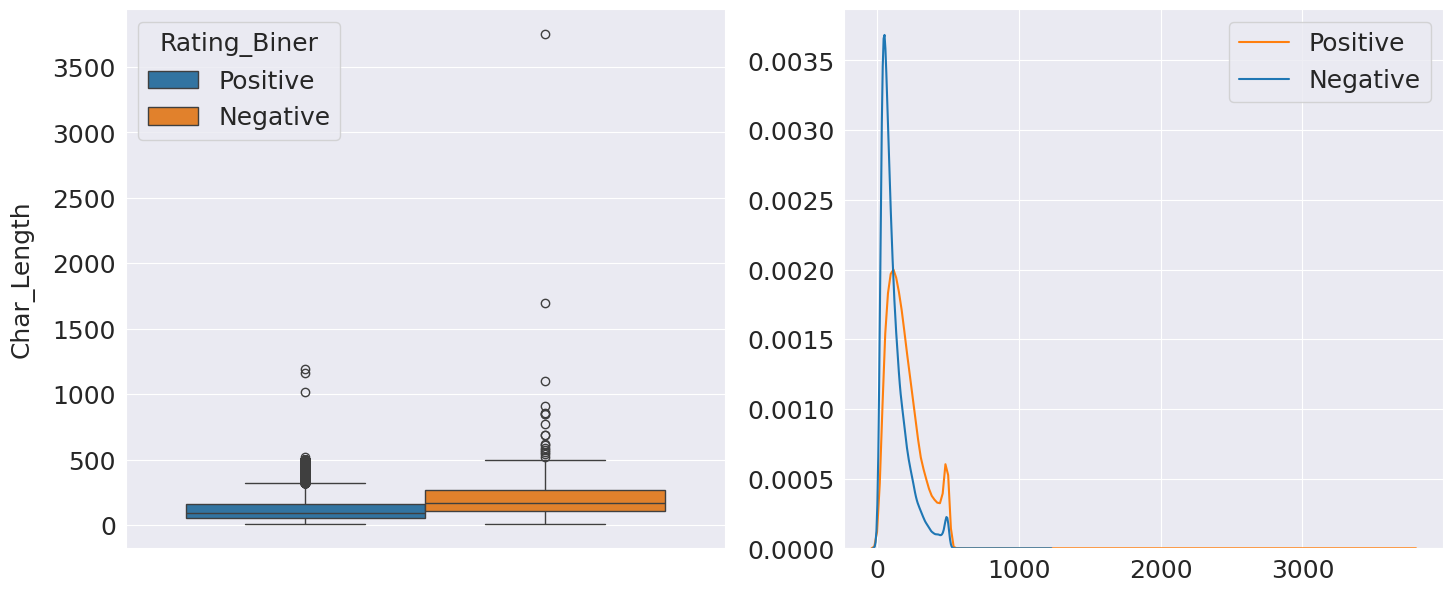

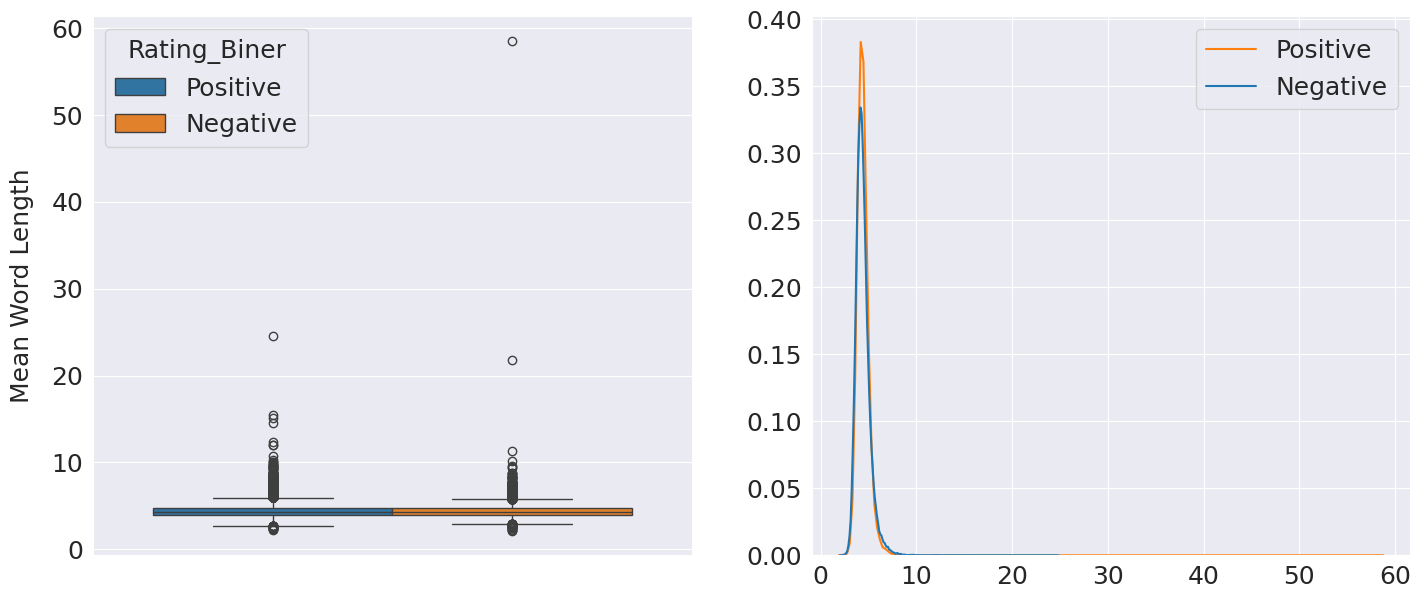

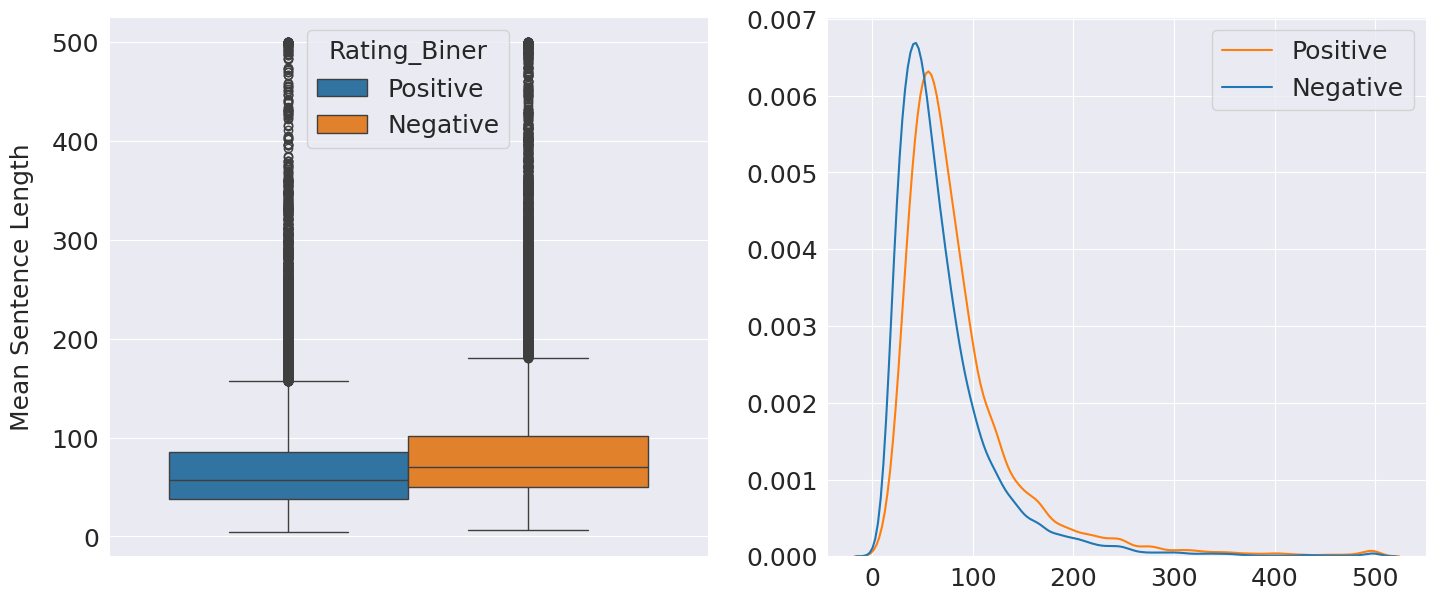

In [20]:
feature = ['Char_Length', 'Mean Word Length', 'Mean Sentence Length']
for col in feature:
    visualize_rating_biner(col)

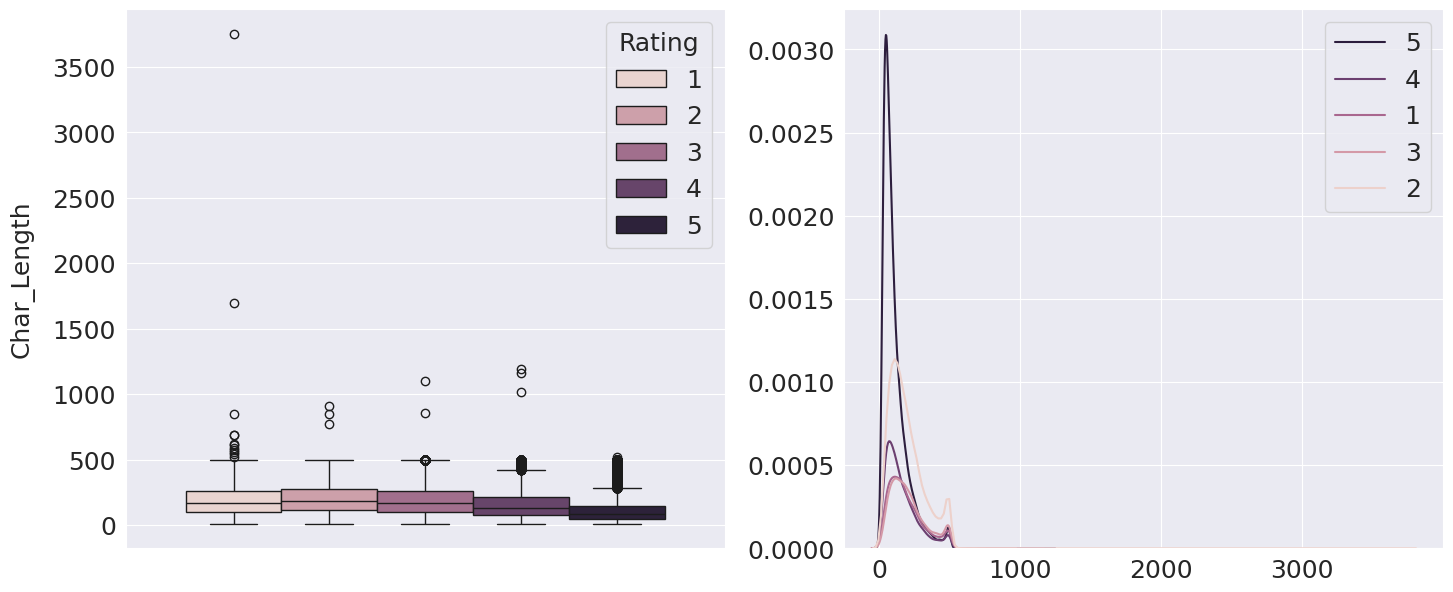

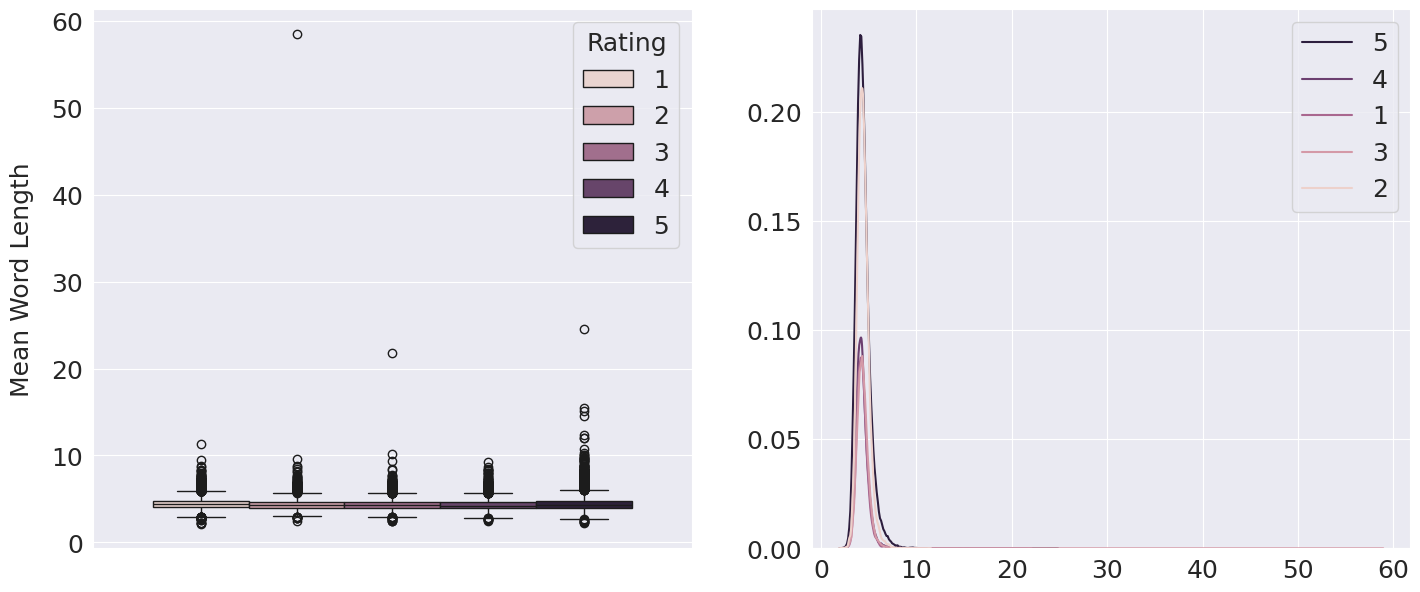

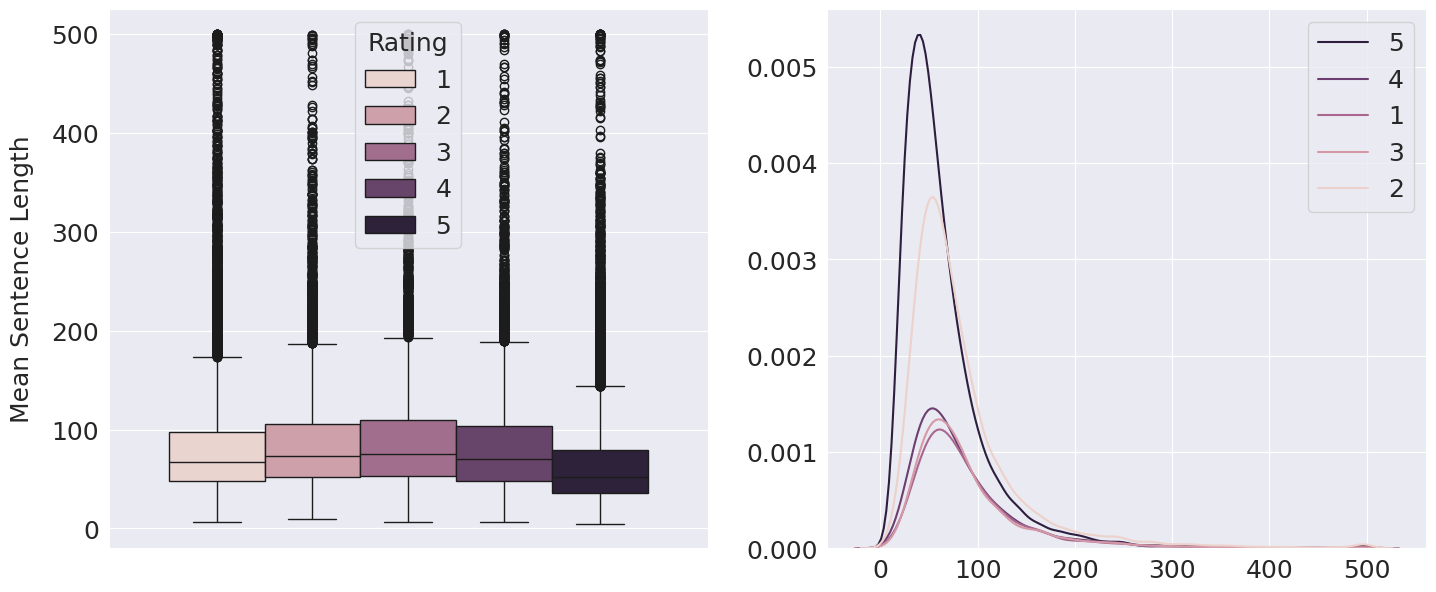

In [21]:
for col in feature:
    visualize_rating(col)

### **Term Frequency Analysis**

In [23]:
df_filter = df[['Review', 'Rating_Biner', 'Word_Count']]
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61594 entries, 2022-07-09 15:00:00 to 2022-01-01 00:19:09
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        61594 non-null  object
 1   Rating_Biner  61594 non-null  object
 2   Word_Count    61594 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ MB
